# Classification

Classification is the process of predicting the class of given data points. Classes are sometiems called labels, targets or categories.  
Classification predictive modeling, short classification, is the task of approximating a mapping function $f$ from input variables $X$ to discrete output variables $y$.

An example for a binary classification might be a spam detector for your email service, since there are only 2 classes, spam or no spam, to classify. If we train our classification algorithm right, we're able to classify previously unknown emails correctly.

Classification algorithms belongs to the family of supervised learning algoirthms. There are two types of learners in classification

## Lazy
- store training data
- classifies based on most related data
- less training time but more time to predict than eager learners
- knn, case-based reasoning

## Eager
- construct classification model based on given training data
- requires single hypothesis that covers entire instance space
- long time training but little time predicting
- Decision Tree, Naive Bayes, Artificial NN

# Algorithms
As in any field of ML there's **no algorithm that fits all** needs. The decision on the algorithm depends on the application and the nature of the available data set.

Starting with eager algorithms.
## Decision Tree
- builds classifiction or regression models in form of a tree structure
- utilizes a set of conditionals which is mutually exclusive and exhaustive for classification
- learns sequentially using training data
- repeated learning until meeting a terminal condition
- top-down recursive divide-and-conquer construction
- categorial or discretized attributes
- attributes higher in the tree have more impact towards classification
- tends to
  - overfit and generate too many branches
  - reflects anomalies
- can be improved by
  - pre-pruning
  - post-pruning

#### Code

In [1]:
from sklearn import tree

X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [2]:
clf.predict([[2,2]])

array([1])

In [3]:
proba = clf.predict_proba([[2., 2.]])
log_proba = clf.predict_log_proba([[2., 2.]])

print(proba)
print(log_proba)

[[0. 1.]]
[[-inf   0.]]


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:948: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


Now using a more advanced, multiclass example for classification:

In [4]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

After a tree is trained, it can be visualized using

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

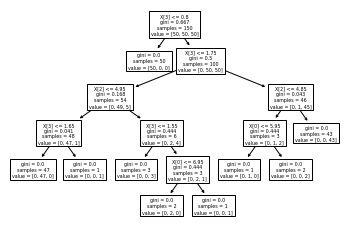

In [5]:
tree.plot_tree(clf)

In [6]:
input_val = [X[15,:]]
output_val = y[15]

pre_tree = clf.predict(input_val)[0]

print('Tree predicted class {pre_tree}, expected {output_val}')

Tree predicted class {pre_tree}, expected {output_val}


In [7]:
import numpy as np
iris = load_iris()
X, y = iris.data, iris.target

x_shape = (X.shape[0] - 1, X.shape[1])

# extract single element, becomes "unknown" element
x = [X[5]]
out = y[5]

X = np.delete(X, 5, 0)
y = np.delete(y, 5, 0)
X = X.reshape(x_shape)

# train the tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

# make the prediction
clf.predict(x) # 0
clf.predict_proba(x) # [1, 0, 0]


array([[1., 0., 0.]])

## Naive Bayes
- probabilistic classifier under assumption that the attributes are conditionally independent
$$
P(X, c_i) = \prod \limits_{k=1}^n P(x_k|c_i) = P(x_1|c_i)\times P(x_2|c_i)\times \ldots \times P(x_n | c_i)
$$
- classification is conducted by deriving the max posterior, $\max\, P(c_i|X)$
- simple algorithm to implement
- good results in most cases
- easy scalable to large datasets
- can suffer from zero probability problem
- needs to be fixed with laplacian estimator

### Implementations

There are multiple implementations available in `sklearn`.

We'll start with **Gaussian Naive Bayes**.

#### Gaussian Naive Bayes
The likelihood of the features is assumed to be Gaussian

$$
P(x_i|y) = \frac{1}{\sqrt{2\pi\sigma_{y}^{2}}}
\text{exp}
\left(
  -\frac{(x_i-\mu_y)^2}{2\sigma_y^2}\right)
$$
where we use the maximum likelihood to estimate $\sigma_y$ and $\mu_y$.

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [9]:
clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f'Number of mislabled points out of a total of {X_test.shape[0]} points: {(y_test != y_pred).sum()}')


Number of mislabled points out of a total of 75 points: 4


#### Multinomial Naive Bayes (MNB)
- naive Bayes for multinomially distributed data
- used in text classification

#### Complement Naive Bayes (CNB)
- adaptation of MNB
- suits for imbalanced datasets
- used in text classification

#### Bernoulli Naive Bayes
- for multivariante Bernoulli distributed data
- might have multiple features, but each needs to be binary
- binary input
- for text classification use word occurence vectors rather than word count vectors

#### Categorical Naive Bayes
- for categorial distributed data where each features has its own categorial distribution
- assumes that all categories for all features are represented with numbers $0, \ldots, n_i - 1$ 

## Artificial Neural Networks
A artificial neural network is a set of connected input/output units where each connection has a weight associated with it. During the learning phase, the network learns by adjusting the weights so as to be able to predict the correct class label of the input tuples.

There are many network architectures like
- Feed Forward NNs
- Convolutional NNs
- Recurrent NNs

But the appropriate architecture depends on the application of the model. So again **no network that fits all needs**. But it's safe to claim that for most cases feed-forward models give reasonably accurate results and especially for tasks like image processing, convolutional networks perform better.

Depending on the complexity of the function which is mapped to the model the model can or can not have multiple hidden layers. Having more hidden layers enables to model complex relationships such as deep neural networks.

#### Pros:
- perform impressively in most real world applications
- high tolerance to noisy data
- can classify untrained patterns
- perform usually better with continuous-valued input and output

#### Cons:
- many hidden layers <=> long training time
- poor interpretability of the model, compared to other models like Decision Trees, due to unknown symbolic meaning of learned weights

### Code

using `sklearn`

In [61]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier


X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


transformed_y_train = []
for elem in y_train:
  vec = [0,0,0]
  vec[elem] = 1.0
  transformed_y_train.append(vec)

X_train = X_train
y_train = transformed_y_train


In [69]:
clf = MLPClassifier()
clf.fit(X_train, y_train)

output = clf.predict([X_test[5, :]])

print(f'Predicted: {output}, Expected: {y_test[5]}')

Predicted: [[0 0 1]], Expected: 2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


#### `pytorch`

In [63]:
import torch
torch_X_train = torch.tensor(X_train, dtype=float)
torch_y_train = torch.tensor(y_train, dtype=float)


Single layer FNN.

**One note:** We need to encode the three available classes "Iris setosa, "Iris virginica" and "Iris versicolor" as three output parameters, to later on get the probability for each class and use simple $\text{argmax}(y_0, y_1, y_2)$ as the final classification.

In [70]:
layer1 = torch.nn.Linear(X_train.shape[1], 3, dtype=float)

layer1(torch.tensor(X_test[5], dtype=float))

tensor([-0.2997,  2.0041, -1.5434], dtype=torch.float64,
       grad_fn=<AddBackward0>)

Adding an optimizer to train

In [77]:
optim = torch.optim.SGD(layer1.parameters(), lr=0.1)

Trying to train the single layer model

In [78]:

for i in range(1000):
  optim.zero_grad()

  o = layer1(torch_X_train)
  
  error = torch.sum((o.view(-1) - torch_y_train.view(-1)) ** 2)
  error.backward()
  if i % 50 == 0:
    print(error)
  optim.step()


tensor(nan, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(nan, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(nan, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(nan, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(nan, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(nan, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(nan, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(nan, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(nan, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(nan, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(nan, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(nan, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(nan, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(nan, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(nan, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(nan, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(nan, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(nan, dtype=torch.float64

In [79]:
output = layer1(torch.tensor(X_test[5], dtype=float))

print(f'Predicted: {output}, Expected: {y_test[5]}')

Predicted: tensor([nan, nan, nan], dtype=torch.float64, grad_fn=<AddBackward0>), Expected: 2


As we can see the result is rather poor. Let's add another layer to the model.

In [96]:
layer1_out = 18
layer2_out = 8
final_out = 3

layer1 = torch.nn.Linear(X_train.shape[1], layer1_out, dtype=float)
layer2 = torch.nn.Linear(layer1_out, layer2_out, dtype=float)
layer3 = torch.nn.Linear(layer2_out, final_out, dtype=float)
layer3(layer2(layer1(torch.tensor(X_test[5], dtype=float))))

tensor([-1.3607,  0.3837,  1.4266], dtype=torch.float64,
       grad_fn=<AddBackward0>)

In [97]:
optim = torch.optim.SGD([*layer1.parameters(), *layer2.parameters(), *layer3.parameters()], lr=0.01)

In [101]:

for epoch in range(500):
  for i in range(len(torch_y_train)):
    optim.zero_grad()

    output = layer3(layer2(layer1(torch_X_train[i])))

    # output = torch.sigmoid(layer3(torch.sigmoid(layer2(torch.sigmoid(layer1(torch_X_train[i]))))))

    error = torch.sum((output.view(-1) - torch_y_train[i]) ** 2)
    error.backward()
    if i % 50 == 0:
      print(error)
    optim.step()

tensor(0.1898, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.0335, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.1638, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.0320, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.1577, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.0315, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.1560, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.0314, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.1555, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.0313, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.1554, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.0313, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.1553, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.0313, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.1553, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.0313, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.1553, dtype=torch.float64, grad

In [102]:
prediction = torch.sigmoid(layer3(torch.sigmoid(layer2(torch.sigmoid(layer1(torch.tensor(X_test[5])))))))
expected = y_test[5]

print(f'Predicted: {prediction}, Expected: {expected}')

Predicted: tensor([0.4031, 0.6914, 0.6723], dtype=torch.float64,
       grad_fn=<SigmoidBackward>), Expected: 2


As we can see neither of the manually created NNs using `pytorch` are giving satisfying results to our test data. Whereas the single layer NN gives bad to unuseful results, the multi layer NN has tendencies to reduce it's error, yet the fluctuation in said error is too unstable.

One thing we could do is adding *activation* functions to each layer. For now all we do is
$$
L(X) = L_3(L_2(L_1(X)))
$$
which is actually equal to
$$
L(X) = P(X),\\
\text{where}\, P = L_3 \cdot L_2 \cdot L_1
$$
As you can see instead of actually adjusting $\beta$ values along the way, we  perform a single matrix-vector multiplication, which means under the hood we do in both cases the same thing.  
So instead of doing all that fancy 3 layer stuff. Let's use two layers, and connect them with an activation function.

Activation functions are a helpful tool to add complexity to the function the algorithm is learning. By adding complexity we can solve the problem of overfitting. But we will come back later in detail about these magic **activation functions**.

For now we just see them as a tool to add complexity, which might improve the quality of predictions in our NN.

One of these functions is sigmoid
$$
\sigma(x) = \frac{1}{1+\exp(-x)}
$$

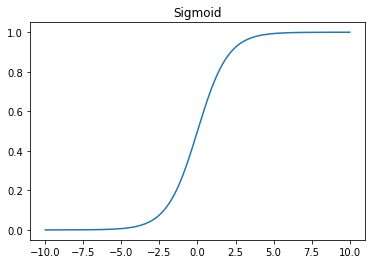

In [86]:
import matplotlib.pyplot as plt

sigmoid = lambda x: 1.0/(1+np.exp(-x))

x = np.linspace(-10, 10, 1000)

plt.title('Sigmoid')
plt.plot(x, sigmoid(x))
plt.show()

This nifty function maps it's input into a range of $[0, 1]$.

Applied to our NN:

In [94]:
for epoch in range(500):
  for i in range(len(torch_y_train)):
    optim.zero_grad()

    o1 = torch.sigmoid(layer1(torch_X_train[i]))
    o2 = torch.sigmoid(layer2(o1))
    output = torch.sigmoid(layer3(o2))

    error = torch.sum((output.view(-1) - torch_y_train[i]) ** 2)
    error.backward()
    if i % 50 == 0:
      print(error)
    optim.step()

tensor(0.5666, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.5527, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.5662, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.5523, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.5658, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.5519, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.5654, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.5514, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.5650, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.5510, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.5645, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.5505, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.5641, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.5500, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.5636, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.5495, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(0.5631, dtype=torch.float64, grad

In [95]:
prediction = torch.sigmoid(layer3(torch.sigmoid(layer2(torch.sigmoid(layer1(torch.tensor(X_test[5])))))))
expected = y_test[5]

print(f'Predicted: {prediction}, Expected: {expected}')

Predicted: tensor([0.0013, 0.1299, 0.9503], dtype=torch.float64,
       grad_fn=<SigmoidBackward>), Expected: 2


So as you can see adding this magical activation function helps to stabalize the prediction error and improve the quality of prediction by magnitudes.

Alright, that covers the eager learners, since all of the above algorithms train a model in advance to generalize the training data und use these models to make predictions.

## k-Nearest Neighbor (KNN)
KNN is a lazy learning algorithm which stores all instances correspond to training data points in an $n$-dim space.  
Calculates for unknown
- discrete data the closest $k$ number of nearest neighbors
- real-valued data the mean of $k$ nearest neighbors

KNN is usually robust to noisy data, since it's averaging the $k$-nearest neighbors.

### Code


In [122]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets


n_neighors = 10

iris = datasets.load_iris()

X = iris.data
y = iris.target

uniform_clf = neighbors.KNeighborsClassifier(n_neighors, weights="uniform")
uniform_clf.fit(X_train, y_train)

uniform_pred = uniform_clf.predict([X_test[5]])

distance_clf = neighbors.KNeighborsClassifier(n_neighors, weights="distance")
distance_clf.fit(X_train, y_train)

distance_pred = distance_clf.predict([X_test[5]])

print(uniform_pred)
print(distance_pred)
print(y_test[5])


[[0. 0. 1.]]
[[0. 0. 1.]]
2


# Evaluation
After training an algorithm it needs to be evaluated to verify its applicability.
We've seen in previous sections things like Precision and Recall, but will now briefly verbalize some of the concepts of evaluation techniques.

### Holdout method
We split the data in the training set into 2 partitisions as test (20%) and train (80%). The train set is used to train the model and the test data set will be used to test its predictive power, as seen in the NN examples.

### Cross-validation
Overfitting is a common problem and can occure in most models. **k-fold cross-validation** can be conducted to verify over-fitting in a model. In this method the data will be randomly partitioned into $k$ mutually exclusive subsets, each approximately equal size and one is kept for testing while others are used for training. This process is iterated throught the whole $k$ folds.

So in other words, we grab a fraction of the training set, use it for testing and then batch the remaining set into batches of the same size as our test set, then apply different batches while testing against the same test set.

## [Precision and Recall](/Machine_Learning/Precision_Recall.ipynb)

